In [1]:
from xinet import utils
from xinet import mxnet as xinet

np = xinet.np

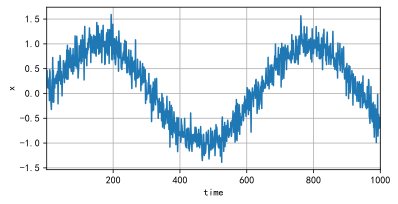

In [2]:
from mxnet.gluon import nn
from mxnet import autograd, gluon, init, np, npx
%matplotlib inline


T = 1000  # 总共产生1000个点
time = np.arange(1, T + 1, dtype=np.float32)
x = np.sin(0.01 * time) + np.random.normal(0, 0.2, (T,))
utils.plot(time, [x], 'time', 'x', xlim=[1, 1000], figsize=(6, 3))

In [3]:
tau = 4
features = np.zeros((T - tau, tau))
for i in range(tau):
    features[:, i] = x[i:T - tau + i]
labels = x[tau:].reshape((-1, 1))

batch_size, n_train = 16, 600
# 只有前`n_train`个样本用于训练
train_iter = xinet.load_array((features[:n_train], labels[:n_train]),
                            batch_size, is_train=True)

In [5]:
# A simple MLP
def get_net():
    net = nn.Sequential()
    net.add(nn.Dense(10, activation='relu'), nn.Dense(1))
    net.initialize(init.Xavier())
    return net

# Square loss
loss = gluon.loss.L2Loss()

def train(net, train_iter, loss, epochs, lr):
    trainer = gluon.Trainer(net.collect_params(), 'adam',
                            {'learning_rate': lr})
    for epoch in range(epochs):
        for X, y in train_iter:
            with autograd.record():
                l = loss(net(X), y)
            l.backward()
            trainer.step(batch_size)
        print(f'epoch {epoch + 1}, '
              f'loss: {xinet.evaluate_loss(net, train_iter, loss):f}')

net = get_net()
train(net, train_iter, loss, 5, 0.01)

epoch 1, loss: 0.039521
epoch 2, loss: 0.031087
epoch 3, loss: 0.028825
epoch 4, loss: 0.028747
epoch 5, loss: 0.027646


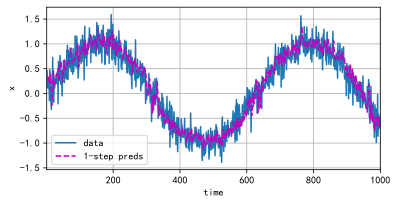

In [9]:
onestep_preds = net(features)
utils.plot([time, time[tau:]],
         [x, onestep_preds], 'time', 'x',
         legend=['data', '1-step preds'], xlim=[1, 1000], figsize=(6, 3))